In [3]:
import numpy as np
import pandas as pd
import datetime
import dateutil
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
import string
from sklearn.ensemble import IsolationForest



## 1.0 Exploratory Data Analysis

### Dataset 1: Whole Country

In [2]:
df = pd.read_csv("WholeCountry.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3248 entries, 0 to 3247
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3248 non-null   object 
 1   Date                    3248 non-null   object 
 2   NumberofConfirmedCases  3232 non-null   float64
dtypes: float64(1), object(2)
memory usage: 76.2+ KB


In [3]:
df.columns = [x.upper() for x in df.columns]
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index("STATE", inplace = True)
print(df.head())


                   DATE  NUMBEROFCONFIRMEDCASES
STATE                                          
Perlis       2020-03-20                     0.0
Kedah        2020-03-20                     1.0
Pulau Pinang 2020-03-20                     5.0
Perak        2020-03-20                    10.0
Selangor     2020-03-20                    40.0


In [5]:
df['DATE'].value_counts() #checking any typo

2020-06-14    16
2020-06-30    16
2020-03-08    16
2020-05-26    16
2020-08-13    16
              ..
2020-03-24    16
2020-08-29    16
2020-05-31    16
2020-08-18    16
2020-03-27    16
Name: DATE, Length: 203, dtype: int64

In [6]:
X = df[['NUMBEROFCONFIRMEDCASES']]
print(len(X))
#clf = IsolationForest(contamination=0.01, behaviour='new', random_state=10)
#outliers = clf.fit_predict(X)
#print(len(outliers))  #No anomalies is detected

3248


D:\CodeBlock\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 90.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\CodeBlock\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 70.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\CodeBlock\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 83.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\CodeBlock\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 78.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\CodeBlock\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 45.3% of the points cannot be placed; you may want to decrease the size of the 

Text(0.5, 1.0, 'Cases in Each State from March till September')

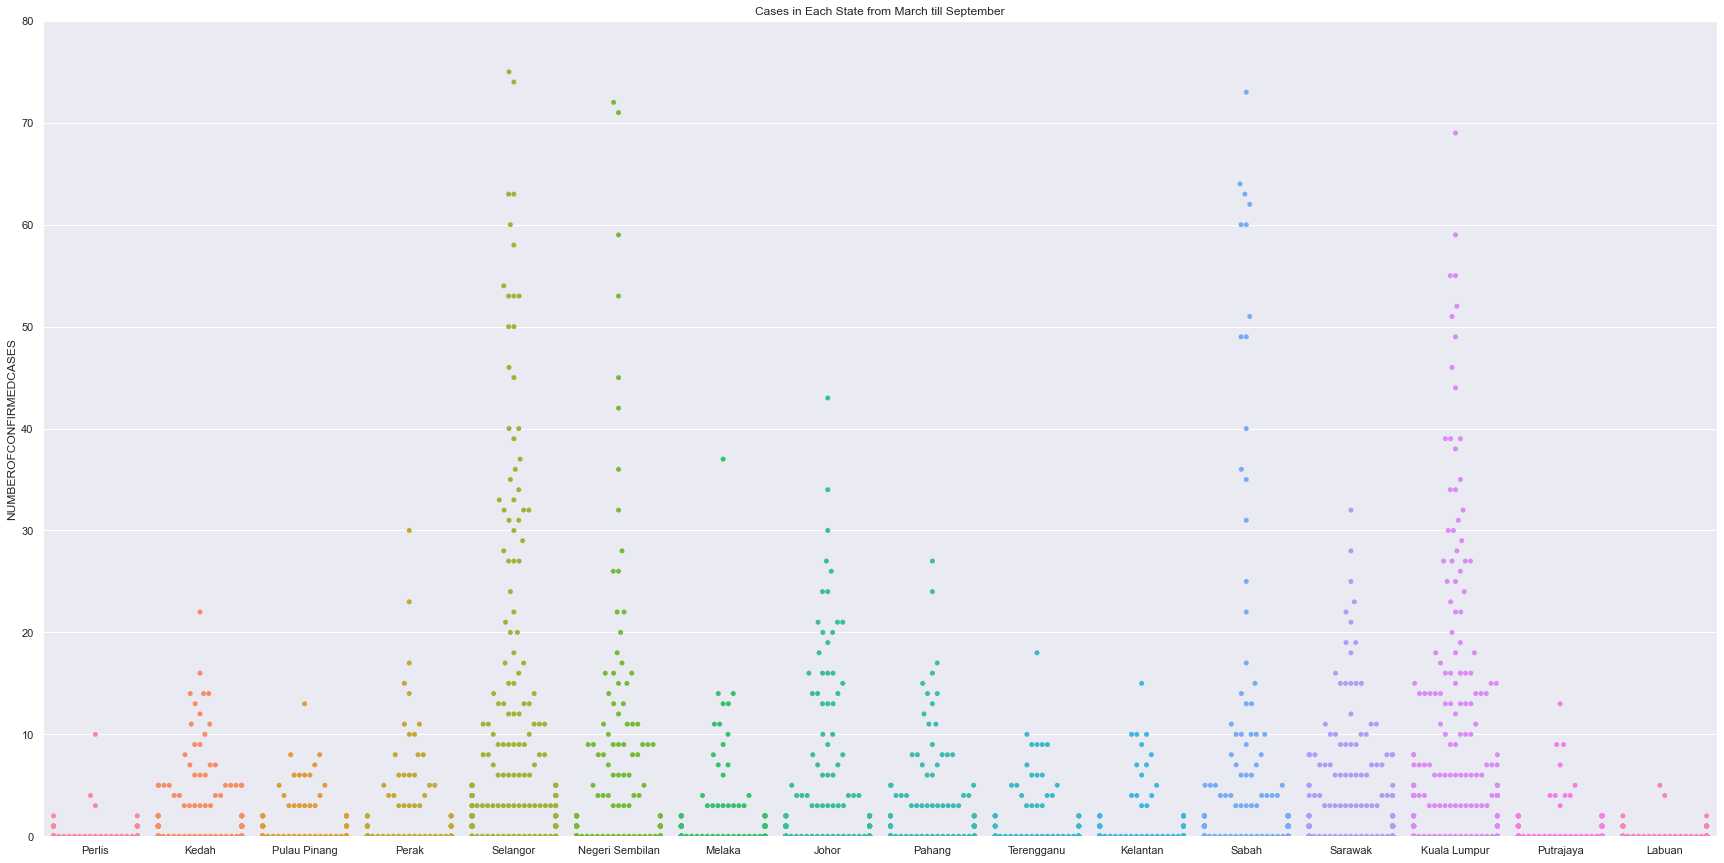

In [7]:
sns.set(rc={'figure.figsize':(30, 15)})
ax = sns.swarmplot(x=df.index.values, y='NUMBEROFCONFIRMEDCASES', data=df)
ax.set(ylim=(0, 80))
plt.title('Cases in Each State from March till September')
#plt.savefig('1.png')

In [8]:
df3 = df.copy()
#g = df3.groupby(pd.Grouper(freq="M"))  # DataFrameGroupBy (grouped by Month)
#df3.set_index('DATE').index.astype('datetime64[ns]')
df3['MONTH'] = df3['DATE'].dt.month 
abc = df3[(df3['MONTH']<10) & (df3['MONTH']>2)]
abc['MONTH'].unique().tolist()
#df3 = df3.drop(abc.index, axis=0, inplace = True) 

[3, 4, 5, 6, 7, 8, 9]

In [9]:
print(df3.head())

                   DATE  NUMBEROFCONFIRMEDCASES  MONTH
STATE                                                 
Perlis       2020-03-20                     0.0      3
Kedah        2020-03-20                     1.0      3
Pulau Pinang 2020-03-20                     5.0      3
Perak        2020-03-20                    10.0      3
Selangor     2020-03-20                    40.0      3


D:\CodeBlock\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\CodeBlock\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 59.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\CodeBlock\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 69.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\CodeBlock\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 74.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\CodeBlock\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 73.3% of the points cannot be placed; you may want to decrease the size of the 

[(0.0, 100.0)]

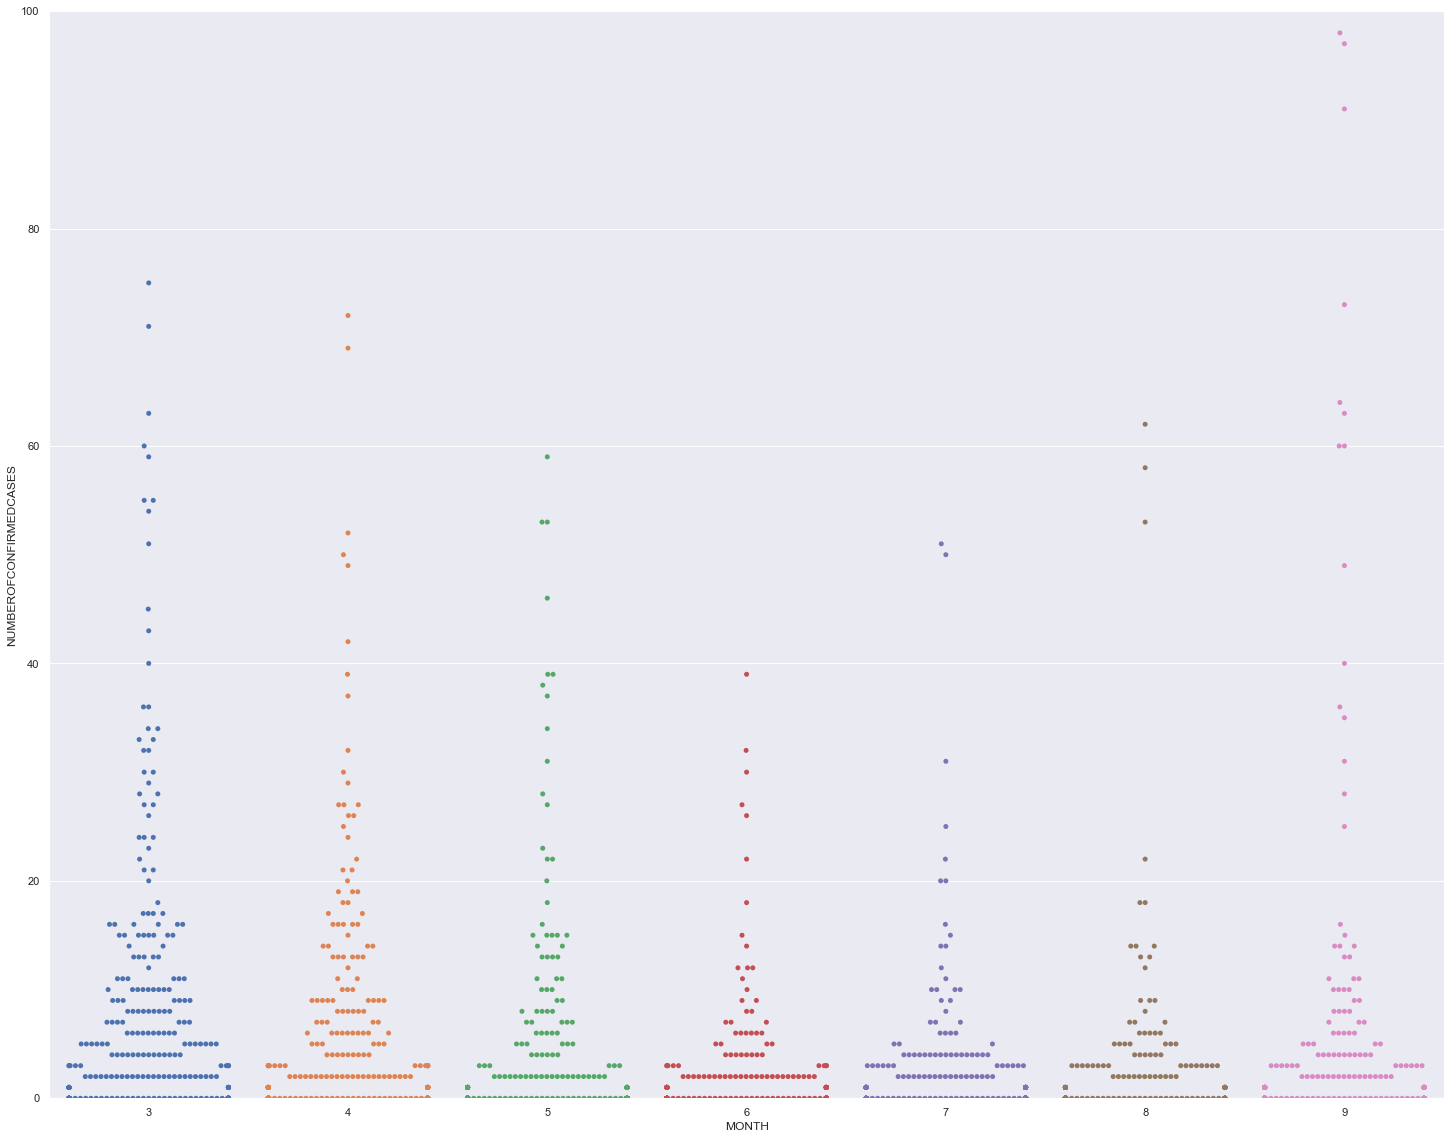

In [10]:
fig, ax = plt.subplots(figsize=(25, 20))
ax = sns.swarmplot(data=abc, x="MONTH", y="NUMBEROFCONFIRMEDCASES",  ax=ax)
ax.set(ylim=(0, 100))


Text(0.5, 1.0, 'Total Cases in Each State from March till September')

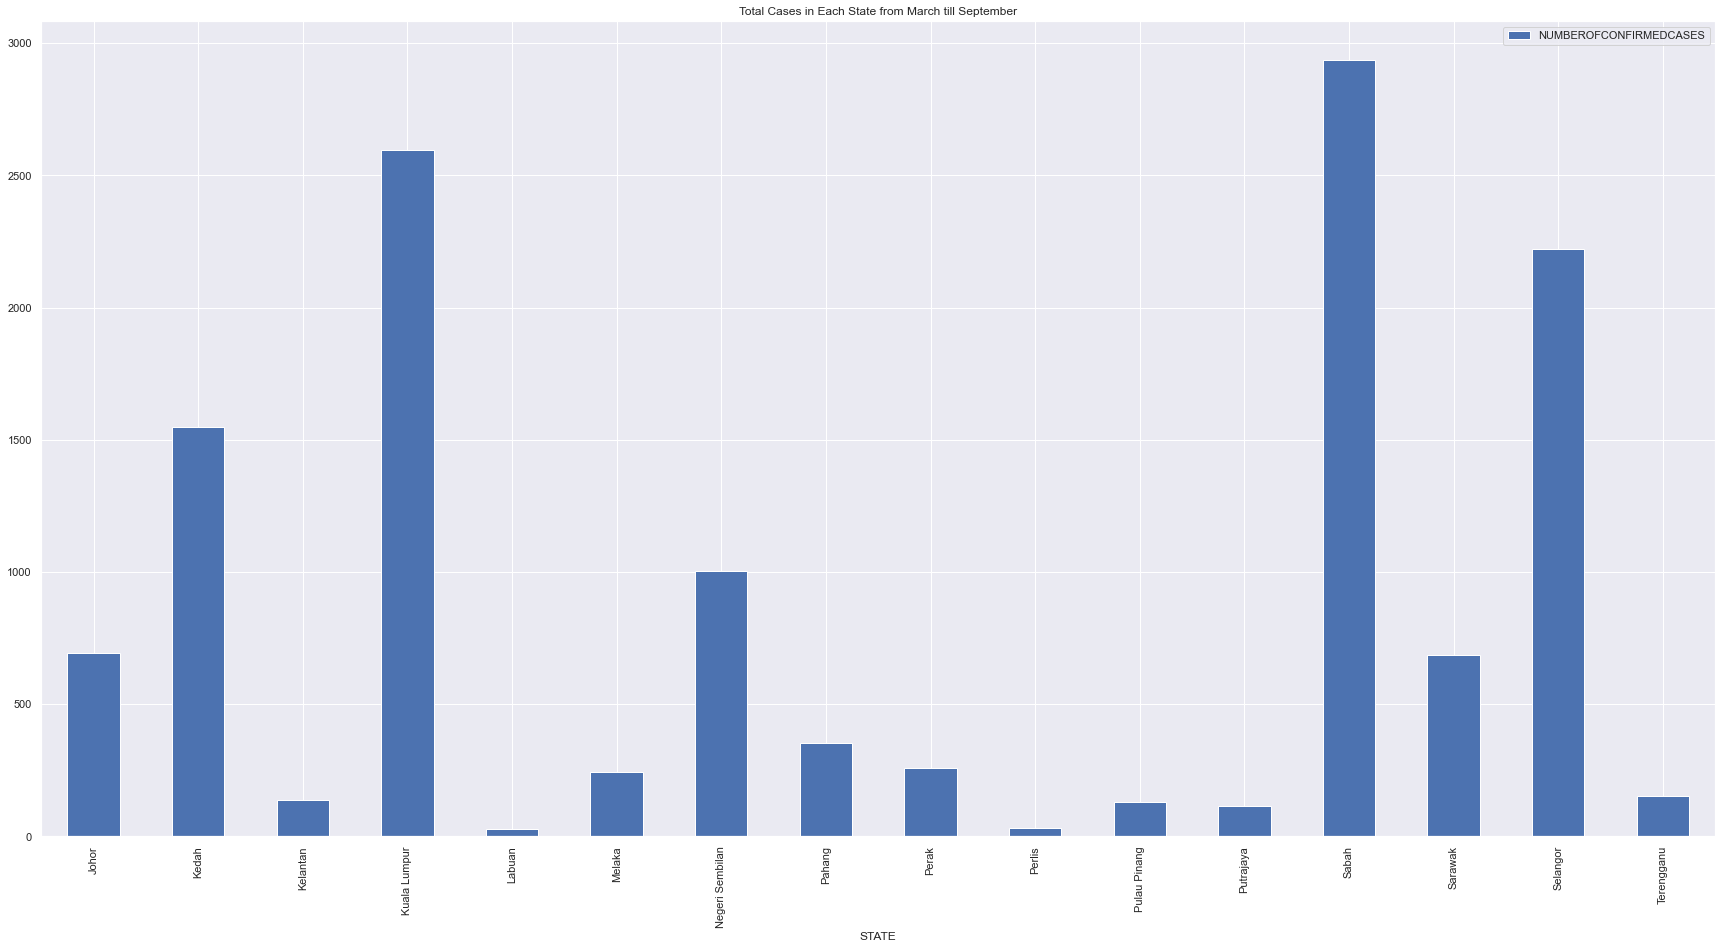

In [11]:
df.groupby(['STATE']).sum().plot(kind='bar')
plt.title('Total Cases in Each State from March till September')


Text(0.5, 1.0, 'Mean of Confirmed Cases by Month')

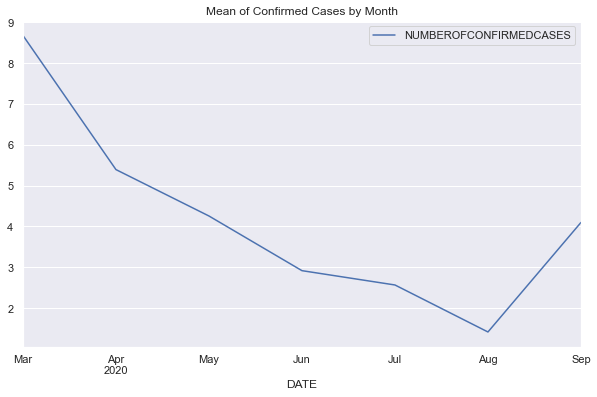

In [12]:
df2 = df.copy()
df2 = df2.groupby(pd.Grouper(key='DATE',freq='M')).mean()
df2 = df2.iloc[2:9]
df2.plot(figsize=(10, 6))
plt.grid(True)
plt.title('Mean of Confirmed Cases by Month')
#plt.savefig('4.png')
#df.groupby(['month']).groups.keys()


In [13]:
df2

,NUMBEROFCONFIRMEDCASES
DATE,
2020-03-31,8.671053
2020-04-30,5.390000
2020-05-31,4.254808
2020-06-30,2.917500
2020-07-31,2.567308
2020-08-31,1.417500
2020-09-30,4.096354


### Dataset 2: Selangor Mukim

In [4]:
se = pd.read_csv("SelangorMukim.csv")
se.columns = [x.upper() for x in se.columns]
se['DATE'] = pd.to_datetime(se['DATE'])
se.set_index("DISTRICT", inplace = True)
se.info()
se

<class 'pandas.core.frame.DataFrame'>
Index: 2187 entries, Gombak to Sepang
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   DATE                     2187 non-null   datetime64[ns]
 1   NUMBEROFCUMULATIVECASES  2187 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 51.3+ KB


,DATE,NUMBEROFCUMULATIVECASES
DISTRICT,,
Gombak,2020-06-04,108
HuluLangat,2020-06-04,324
HuluSelangor,2020-06-04,27
Klang,2020-06-04,115
KualaLangat,2020-06-04,22
...,...,...
KualaLangat,2020-04-12,670
KualaSelangor,2020-04-12,183
Petaling,2020-04-12,2442


In [15]:
se['DATE'].value_counts()#checking any typo

2020-06-14    9
2020-05-31    9
2020-04-26    9
2020-08-28    9
2020-07-14    9
             ..
2020-09-05    9
2020-07-22    9
2020-06-07    9
2020-10-09    9
2020-07-29    9
Name: DATE, Length: 178, dtype: int64

In [16]:
X2 = se[['NUMBEROFCUMULATIVECASES']]
print(len(X2))
#clf2 = IsolationForest(contamination=0.01, behaviour='new', random_state=10)
#outliers2 = clf2.fit_predict(X2)
#print(len(outliers2))  #No anomalities is detected

1602


In [17]:
    se3 = se.copy()
    #g = df3.groupby(pd.Grouper(freq="M"))  # DataFrameGroupBy (grouped by Month)
    #df3.set_index('DATE').index.astype('datetime64[ns]')
    se3['MONTH'] = se3['DATE'].dt.month 
    abc2 = se3[(se3['MONTH']<10) & (se3['MONTH']>2)]
    abc2['MONTH'].unique().tolist()

[6, 7, 8, 9, 4, 3, 5]

In [18]:
print(abc2.head())

                   DATE  NUMBEROFCUMULATIVECASES  MONTH
DISTRICT                                               
Gombak       2020-06-04                      108      6
HuluLangat   2020-06-04                      324      6
HuluSelangor 2020-06-04                       27      6
Klang        2020-06-04                      115      6
KualaLangat  2020-06-04                       22      6


Text(0.5, 1.0, 'Number of Cases in Township of Selangor by Month')

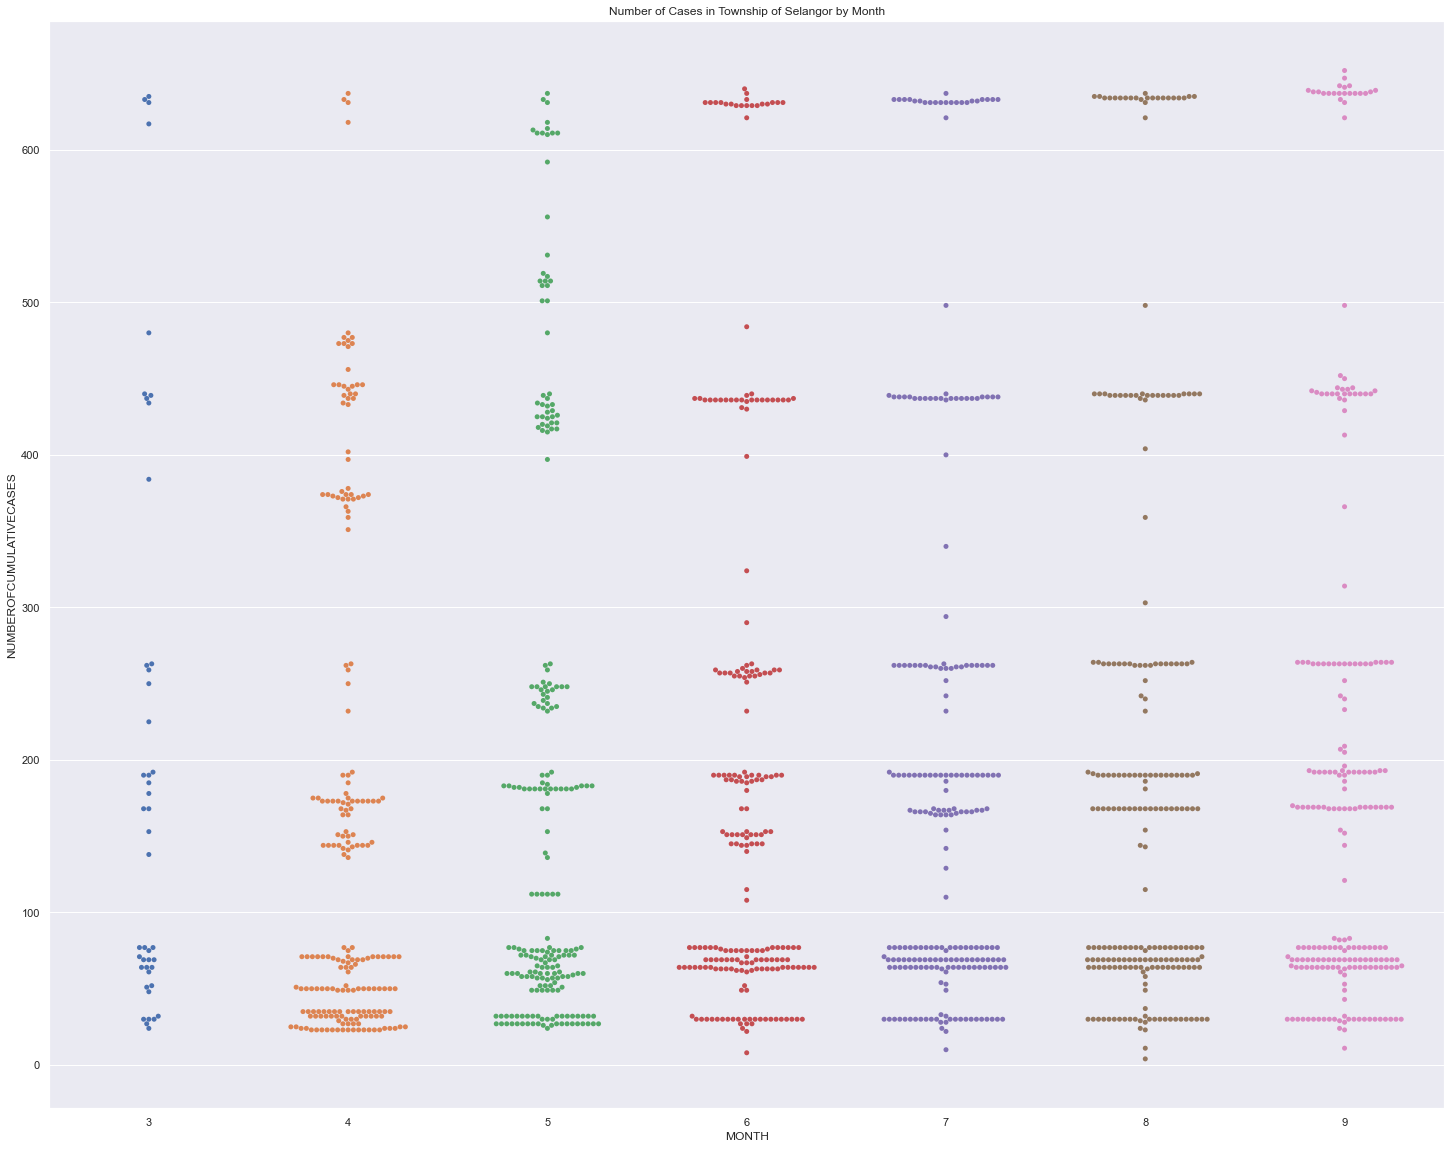

In [19]:
fig, ax = plt.subplots(figsize=(25, 20))
ax = sns.swarmplot(data=abc2, x="MONTH", y="NUMBEROFCUMULATIVECASES",  ax=ax)
plt.title("Number of Cases in Township of Selangor by Month")


D:\CodeBlock\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 28.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\CodeBlock\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 20.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\CodeBlock\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 53.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\CodeBlock\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 38.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\CodeBlock\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 54.5% of the points cannot be placed; you may want to decrease the size of the 

Text(0.5, 1.0, 'Number of Cases in Township of Selangor from March till September')

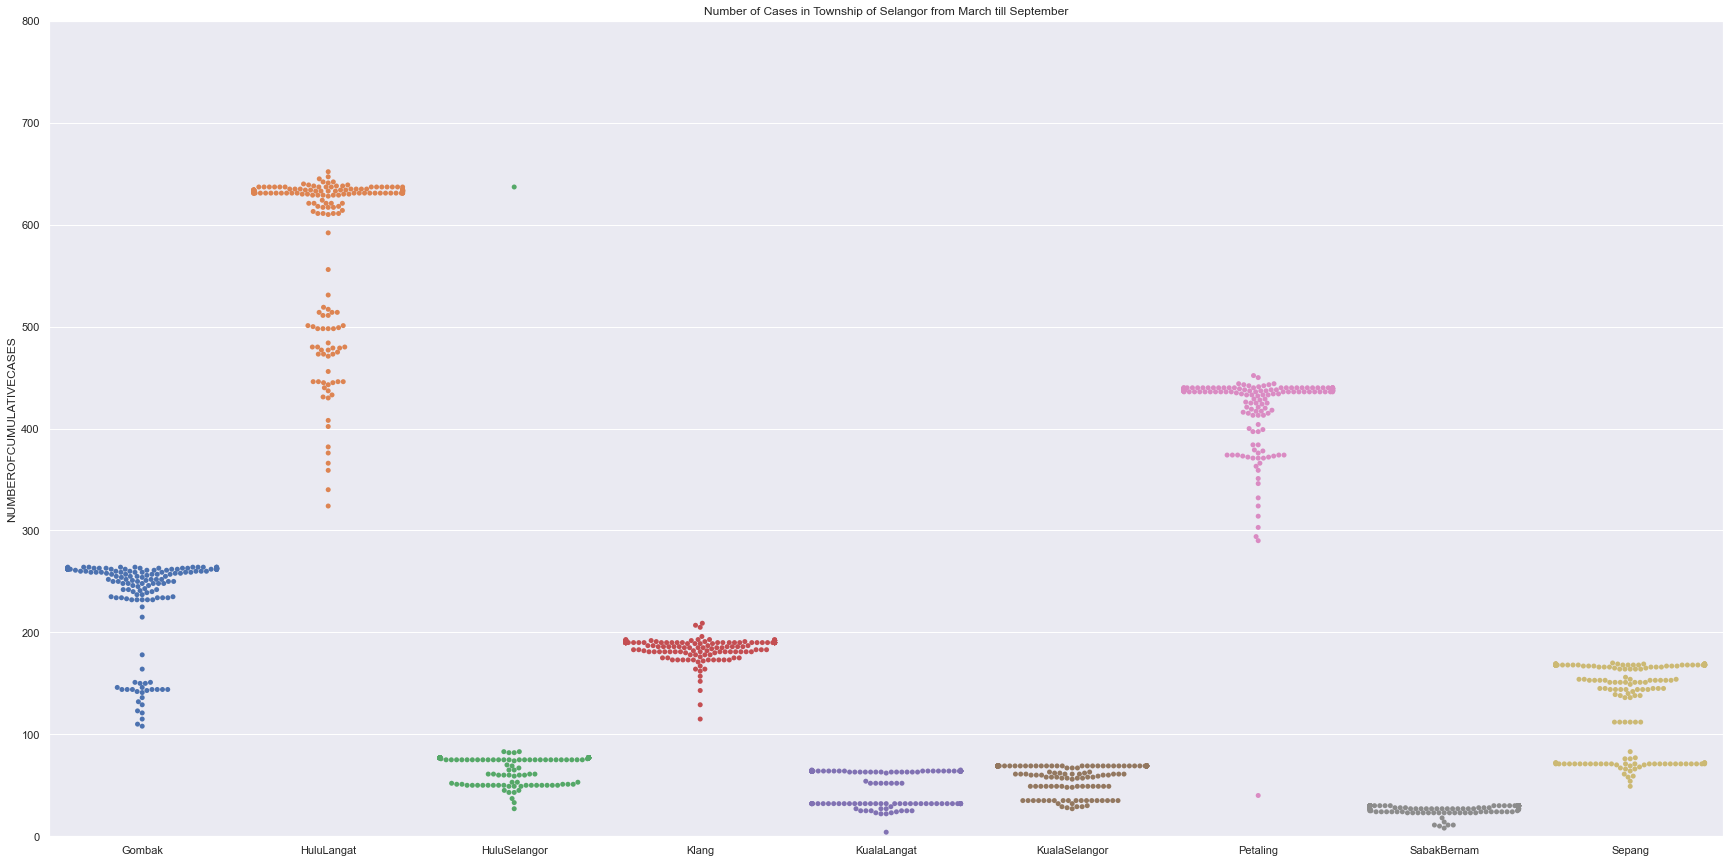

In [20]:
sns.set(rc={'figure.figsize':(30, 15)})
ax = sns.swarmplot(x=se.index.values, y='NUMBEROFCUMULATIVECASES', data=se)
ax.set(ylim=(0, 800))
plt.title("Number of Cases in Township of Selangor from March till September")


Text(0.5, 0, 'Number of Cumulative Cases')

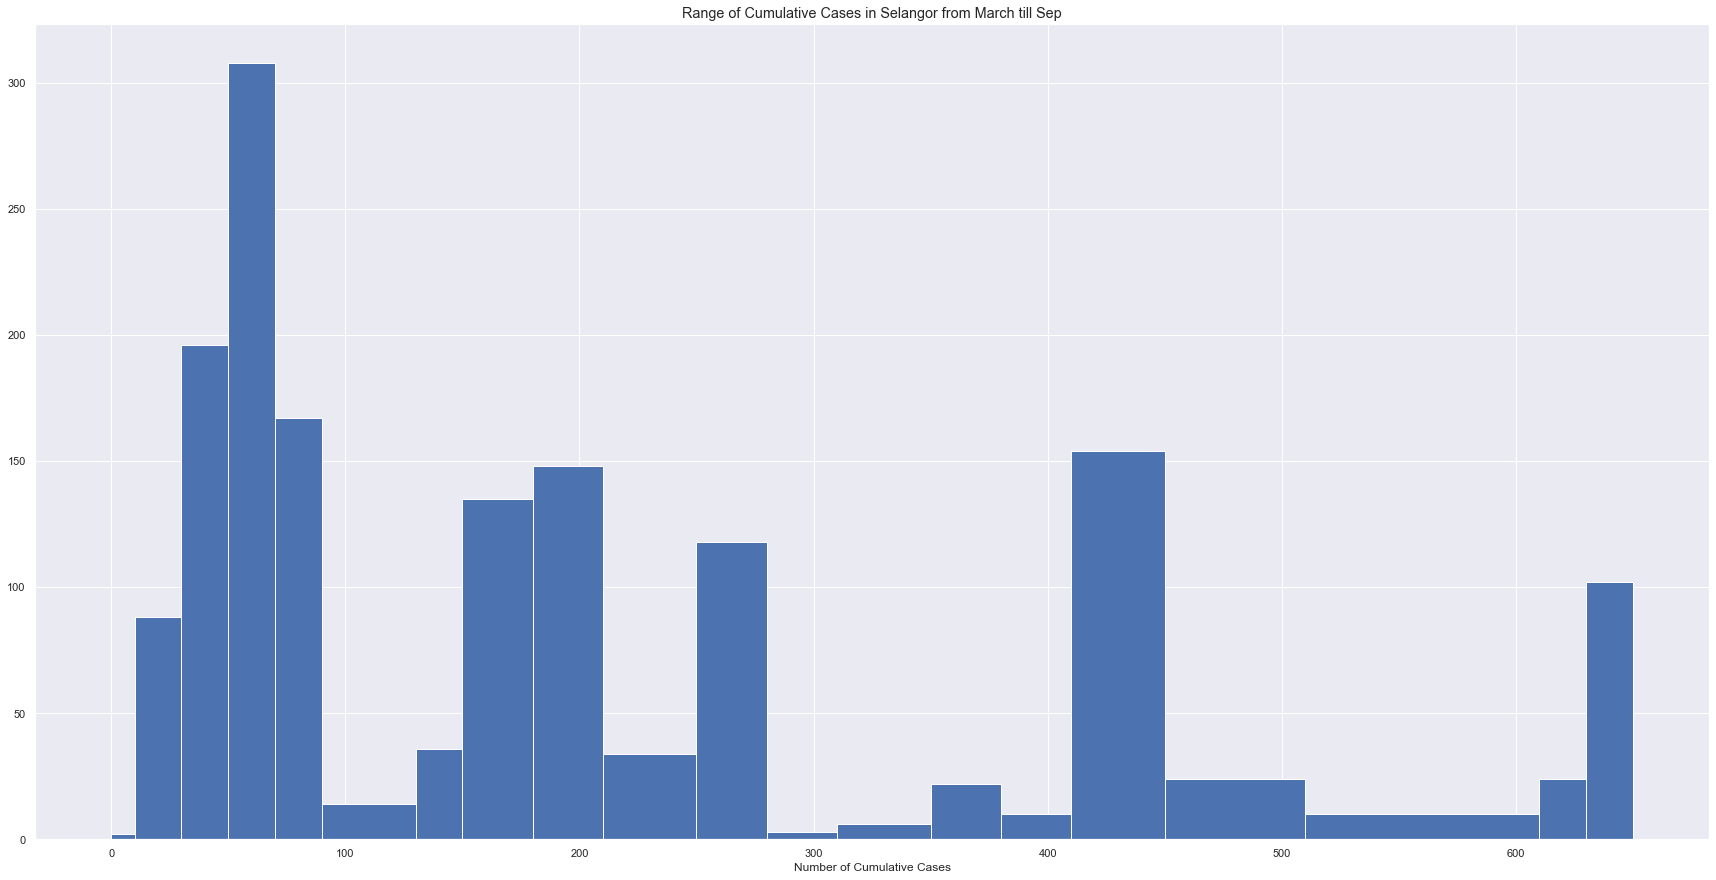

In [21]:
plt.hist(se["NUMBEROFCUMULATIVECASES"], bins=[0,10,30,50,70,90,130,150,180,210,250,280,310,350,380,
                                              410,450,510,610,630,650])
plt.style.use('ggplot')
plt.title("Range of Cumulative Cases in Selangor from March till Sep")
plt.xlabel('Number of Cumulative Cases')


In [22]:
se2 = se.copy()
se2 = se2.groupby(pd.Grouper(key='DATE',freq='M')).mean()
se2 = se2.iloc[2:9]

In [23]:
se2

,NUMBEROFCUMULATIVECASES
DATE,
2020-03-31,202.488889
2020-04-30,163.260870
2020-05-31,189.953704
2020-06-30,203.217593
2020-07-31,207.951111
2020-08-31,208.577778
2020-09-30,210.083333


Text(0.5, 1.0, 'Cumulative Average Cases by Month')

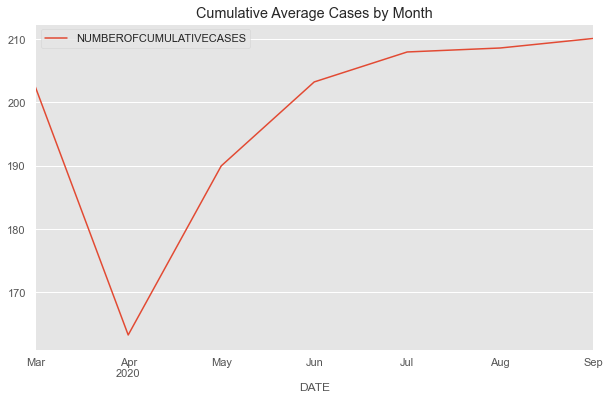

In [24]:
se2.plot(figsize=(10, 6))
plt.grid(True)
plt.title('Cumulative Average Cases by Month')
#plt.savefig('8.png')

## 2.0 Rate of Change Graph

In [203]:
roc = pd.read_csv("State.csv")
roc.columns = [x.upper() for x in roc.columns]
roc['DATE'] = pd.to_datetime(roc['DATE'])
#roc.info()
roc['DATE'].value_counts()
roc['PERLIS'] = (roc['PERLIS'].transform(lambda s: s.sub(s.shift().fillna(0)).abs()))
roc['KEDAH'] = (roc['KEDAH'].transform(lambda s: s.sub(s.shift().fillna(0)).abs()))
roc['PULAUPINANG'] = (roc['PULAUPINANG'].transform(lambda s: s.sub(s.shift().fillna(0)).abs()))
roc['PERAK'] = (roc['PERAK'].transform(lambda s: s.sub(s.shift().fillna(0)).abs()))
roc['SELANGOR'] = (roc['SELANGOR'].transform(lambda s: s.sub(s.shift().fillna(0)).abs()))
roc['NEGERISEMBILAN'] = (roc['NEGERISEMBILAN'].transform(lambda s: s.sub(s.shift().fillna(0)).abs()))
roc['JOHOR'] = (roc['JOHOR'].transform(lambda s: s.sub(s.shift().fillna(0)).abs()))
roc['PAHANG'] = (roc['PAHANG'].transform(lambda s: s.sub(s.shift().fillna(0)).abs()))
roc['MELAKA'] = (roc['MELAKA'].transform(lambda s: s.sub(s.shift().fillna(0)).abs()))
roc['TERENGGANU'] = (roc['TERENGGANU'].transform(lambda s: s.sub(s.shift().fillna(0)).abs()))
roc['KELANTAN'] = (roc['KELANTAN'].transform(lambda s: s.sub(s.shift().fillna(0)).abs()))
roc['SABAH'] = (roc['SABAH'].transform(lambda s: s.sub(s.shift().fillna(0)).abs()))
roc['SARAWAK'] = (roc['SARAWAK'].transform(lambda s: s.sub(s.shift().fillna(0)).abs()))
roc['KUALALUMPUR'] = (roc['KUALALUMPUR'].transform(lambda s: s.sub(s.shift().fillna(0)).abs()))
roc['PUTRAJAYA'] = (roc['PUTRAJAYA'].transform(lambda s: s.sub(s.shift().fillna(0)).abs()))
roc['LABUAN'] = (roc['LABUAN'].transform(lambda s: s.sub(s.shift().fillna(0)).abs()))
#roc.info()
#print(roc.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DATE            302 non-null    datetime64[ns]
 1   PERLIS          302 non-null    float64       
 2   KEDAH           302 non-null    float64       
 3   PULAUPINANG     302 non-null    float64       
 4   PERAK           302 non-null    float64       
 5   SELANGOR        302 non-null    float64       
 6   NEGERISEMBILAN  302 non-null    float64       
 7   MELAKA          302 non-null    float64       
 8   JOHOR           302 non-null    float64       
 9   PAHANG          302 non-null    float64       
 10  TERENGGANU      302 non-null    float64       
 11  KELANTAN        302 non-null    float64       
 12  SABAH           302 non-null    float64       
 13  SARAWAK         302 non-null    float64       
 14  KUALALUMPUR     302 non-null    float64       
 15  PUTRAJ

In [208]:
#Rate of change column
roc['ROC_PERLIS'] = roc['PERLIS'].diff()
roc['ROC_KEDAH'] = roc['KEDAH'].diff()
roc['ROC_PULAUPINANG'] = roc['PULAUPINANG'].diff()
roc['ROC_PERAK'] = roc['PERAK'].diff()
roc['ROC_SELANGOR'] = roc['SELANGOR'].diff()
roc['ROC_NEGERISEMBILAN'] = roc['NEGERISEMBILAN'].diff()
roc['ROC_MELAKA'] = roc['MELAKA'].diff()
roc['ROC_JOHOR'] = roc['JOHOR'].diff()
roc['ROC_PAHANG'] = roc['PAHANG'].diff()
roc['ROC_TERENGGANU'] = roc['TERENGGANU'].diff()
roc['ROC_KELANTAN'] = roc['KELANTAN'].diff()
roc['ROC_SABAH'] = roc['SABAH'].diff()
roc['ROC_SARAWAK'] = roc['SARAWAK'].diff()
roc['ROC_KUALALUMPUR'] = roc['KUALALUMPUR'].diff()
roc['ROC_PUTRAJAYA'] = roc['PUTRAJAYA'].diff()
roc['ROC_LABUAN'] = roc['LABUAN'].diff()
#Percentage change column
roc['percentchange_PERLIS'] = roc['PERLIS'].pct_change()*100
roc['percentchange_PERLIS'] = roc['percentchange_PERLIS'].bfill()
roc['percentchange_KEDAH'] = roc['KEDAH'].pct_change()*100
roc['percentchange_KEDAH'] = roc['percentchange_KEDAH'].bfill()
roc['percentchange_PULAUPINANG'] = roc['PULAUPINANG'].pct_change()*100
roc['percentchange_PULAUPINANG'] = roc['percentchange_PULAUPINANG'].bfill()
roc['percentchange_PERAK'] = roc['PERAK'].pct_change()*100
roc['percentchange_PERAK'] = roc['percentchange_PERAK'].bfill()
roc['percentchange_SELANGOR'] = roc['SELANGOR'].pct_change()*100
roc['percentchange_SELANGOR'] = roc['percentchange_SELANGOR'].bfill()
roc['percentchange_NEGERISEMBILAN'] = roc['NEGERISEMBILAN'].pct_change()*100
roc['percentchange_NEGERISEMBILAN'] = roc['percentchange_NEGERISEMBILAN'].bfill()
roc['percentchange_MELAKA'] = roc['MELAKA'].pct_change()*100
roc['percentchange_MELAKA'] = roc['percentchange_MELAKA'].bfill()
roc['percentchange_JOHOR'] = roc['JOHOR'].pct_change()*100
roc['percentchange_JOHOR'] = roc['percentchange_JOHOR'].bfill()
roc['percentchange_PAHANG'] = roc['PAHANG'].pct_change()*100
roc['percentchange_PAHANG'] = roc['percentchange_PAHANG'].bfill()
roc['percentchange_TERENGGANU'] = roc['TERENGGANU'].pct_change()*100
roc['percentchange_TERENGGANU'] = roc['percentchange_TERENGGANU'].bfill()
roc['percentchange_KELANTAN'] = roc['KELANTAN'].pct_change()*100
roc['percentchange_KELANTAN'] = roc['percentchange_KELANTAN'].bfill()
roc['percentchange_SABAH'] = roc['SABAH'].pct_change()*100
roc['percentchange_SABAH'] = roc['percentchange_SABAH'].bfill()
roc['percentchange_SARAWAK'] = roc['SARAWAK'].pct_change()*100
roc['percentchange_SARAWAK'] = roc['percentchange_SARAWAK'].bfill()
roc['percentchange_KUALALUMPUR'] = roc['KUALALUMPUR'].pct_change()*100
roc['percentchange_KUALALUMPUR'] = roc['percentchange_KUALALUMPUR'].bfill()
roc['percentchange_PUTRAJAYA'] = roc['PUTRAJAYA'].pct_change()*100
roc['percentchange_PUTRAJAYA'] = roc['percentchange_PUTRAJAYA'].bfill()
roc['percentchange_LABUAN'] = roc['LABUAN'].pct_change()*100
roc['percentchange_LABUAN'] = roc['percentchange_LABUAN'].bfill()
#roc.to_csv(r'C:\Users\Ann\OneDrive\Desktop\fyp\Coding\ROCState2.csv', index = False)
#find the highest value with whole row

In [205]:
roc2 = roc.copy()
roc2.set_index("DATE", inplace = True)
roc2 = roc2.drop(['PERLIS'], axis = 1)
roc2 = roc2.drop(['KEDAH'], axis = 1)
roc2 = roc2.drop(['PULAUPINANG'], axis = 1)
roc2 = roc2.drop(['PERAK'], axis = 1)
roc2 = roc2.drop(['SELANGOR'], axis = 1)
roc2 = roc2.drop(['NEGERISEMBILAN'], axis = 1)
roc2 = roc2.drop(['MELAKA'], axis = 1)
roc2 = roc2.drop(['JOHOR'], axis = 1)
roc2 = roc2.drop(['PAHANG'], axis = 1)
roc2 = roc2.drop(['TERENGGANU'], axis = 1)
roc2 = roc2.drop(['KELANTAN'], axis = 1)
roc2 = roc2.drop(['SABAH'], axis = 1)
roc2 = roc2.drop(['SARAWAK'], axis = 1)
roc2 = roc2.drop(['KUALALUMPUR'], axis = 1)
roc2 = roc2.drop(['PUTRAJAYA'], axis = 1)
roc2 = roc2.drop(['LABUAN'], axis = 1)
#roc2

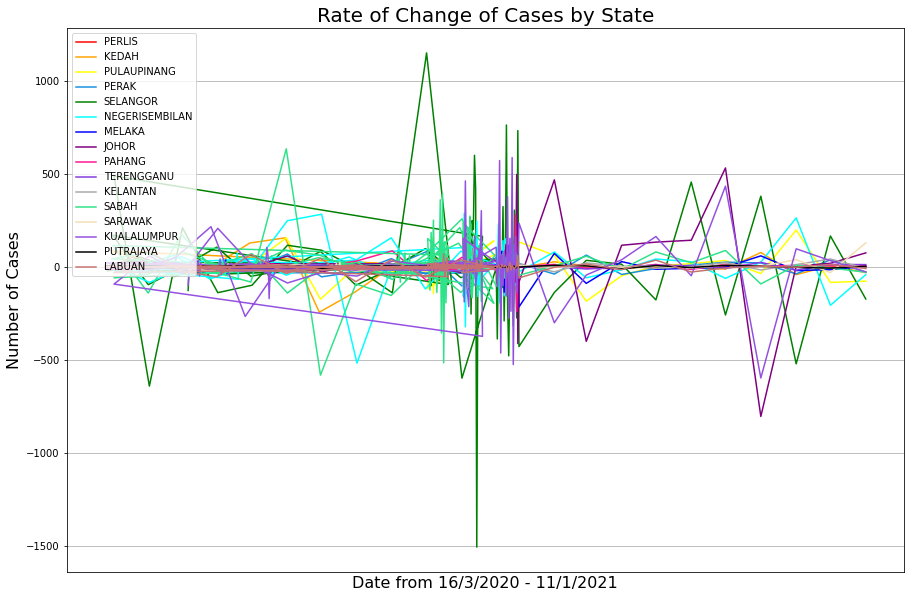

In [207]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(roc2['ROC_PERLIS'], label = 'PERLIS', color = 'red')
plt.plot(roc2['ROC_KEDAH'], label = 'KEDAH', color = 'orange')
plt.plot(roc2['ROC_PULAUPINANG'], label = 'PULAUPINANG', color = 'yellow')
plt.plot(roc2['ROC_PERAK'], label = 'PERAK', color = '#1890df')
plt.plot(roc2['ROC_SELANGOR'], label = 'SELANGOR', color = 'green')
plt.plot(roc2['ROC_NEGERISEMBILAN'], label = 'NEGERISEMBILAN', color = 'cyan')
plt.plot(roc2['ROC_MELAKA'], label = 'MELAKA', color = 'blue')
plt.plot(roc2['ROC_JOHOR'], label = 'JOHOR', color = 'purple')
plt.plot(roc2['ROC_PAHANG'], label = 'PAHANG', color = 'deeppink')
plt.plot(roc2['ROC_TERENGGANU'], label = 'TERENGGANU', color = '#873ae1')
plt.plot(roc2['ROC_KELANTAN'], label = 'KELANTAN', color = 'darkgray')
plt.plot(roc2['ROC_SABAH'], label = 'SABAH', color = '#2fe289')
plt.plot(roc2['ROC_SARAWAK'], label = 'SARAWAK', color = 'wheat')
plt.plot(roc2['ROC_KUALALUMPUR'], label = 'KUALALUMPUR', color = '#9450e0')
plt.plot(roc2['ROC_PUTRAJAYA'], label = 'PUTRAJAYA', color = 'black')
plt.plot(roc2['ROC_LABUAN'], label = 'LABUAN', color = '#C67171')
plt.legend(loc=2)
plt.xticks([])
plt.title('Rate of Change of Cases by State', fontsize=20)
plt.xlabel('Date from 16/3/2020 - 11/1/2021', fontsize=16)
plt.ylabel('Number of Cases', fontsize=16)
#plt.savefig('ROC_STATE.png')

### Not Used

In [209]:
Total = pd.read_csv("All.csv")
Total.columns = [x.upper() for x in Total.columns]
Total['DATE'] = pd.to_datetime(roc['DATE'])
Total.info()
Total['DATE'].value_counts()
#print(Total.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DATE        302 non-null    datetime64[ns]
 1   CASES       354 non-null    int64         
 2   DISCHARGED  354 non-null    int64         
 3   DEATH       354 non-null    int64         
 4   ICU         354 non-null    int64         
 5   DAILYCASES  354 non-null    int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 16.7 KB


2020-04-13    1
2020-04-29    1
2020-12-16    1
2020-11-15    1
2020-10-15    1
             ..
2020-06-29    1
2020-05-29    1
2020-04-28    1
2020-03-28    1
2020-02-11    1
Name: DATE, Length: 302, dtype: int64

In [210]:
Total['ROC_CASES'] = Total['CASES'].diff()
Total['ROC_DISCHARGED'] = Total['DISCHARGED'].diff()
Total['ROC_DEATH'] = Total['DEATH'].diff()
Total['ROC_ICU'] = Total['ICU'].diff()
Total['ROC_DAILYCASES'] = Total['DAILYCASES'].diff()

Total['percentchange_CASES'] = Total['CASES'].pct_change()*100
Total['percentchange_CASES'] = Total['percentchange_CASES'].bfill()
Total['percentchange_DISCHARGED'] = Total['DISCHARGED'].pct_change()*100
Total['percentchange_DISCHARGED'] = Total['percentchange_DISCHARGED'].bfill()
Total['percentchange_DEATH'] = Total['DEATH'].pct_change()*100
Total['percentchange_DEATH'] = Total['percentchange_DEATH'].bfill()
Total['percentchange_ICU'] = Total['ICU'].pct_change()*100
Total['percentchange_ICU'] = Total['percentchange_ICU'].bfill()
Total['percentchange_DAILYCASES'] = Total['DAILYCASES'].pct_change()*100
Total['percentchange_DAILYCASES'] = Total['percentchange_DAILYCASES'].bfill()
#Total.to_csv(r'C:\Users\Ann\OneDrive\Desktop\fyp\Coding\TotalROC.csv', index = False)



In [213]:
Total2 = Total.copy()
Total2.set_index("DATE", inplace = True)
Total2 = Total2.drop(['CASES'], axis = 1)
Total2 = Total2.drop(['DISCHARGED'], axis = 1)
Total2 = Total2.drop(['DEATH'], axis = 1)
Total2 = Total2.drop(['ICU'], axis = 1)
Total2 = Total2.drop(['DAILYCASES'], axis = 1)
Total2 = Total2.dropna()
Total2

,ROC_CASES,ROC_DISCHARGED,ROC_DEATH,ROC_ICU,ROC_DAILYCASES,percentchange_CASES,percentchange_DISCHARGED,percentchange_DEATH,percentchange_ICU,percentchange_DAILYCASES
DATE,,,,,,,,,,
2020-03-17,3.0,0.0,0.0,0.0,3.0,inf,inf,inf,inf,inf
2020-03-18,1.0,0.0,0.0,0.0,-2.0,33.333333,inf,inf,inf,-66.666667
2020-03-19,0.0,0.0,0.0,0.0,-1.0,0.000000,inf,inf,inf,-100.000000
2020-03-20,0.0,0.0,0.0,0.0,0.0,0.000000,inf,inf,inf,inf
2020-03-21,3.0,0.0,0.0,0.0,3.0,75.000000,inf,inf,inf,inf
...,...,...,...,...,...,...,...,...,...,...
NaT,3027.0,2145.0,8.0,1.0,434.0,2.413144,2.132673,1.559454,0.709220,16.737370
NaT,2643.0,2708.0,16.0,28.0,-384.0,2.057370,2.636216,3.071017,19.718310,-12.685828
NaT,2451.0,1401.0,5.0,7.0,-192.0,1.869451,1.328831,0.931099,4.117647,-7.264472


Text(0, 0.5, 'Number of Cases')

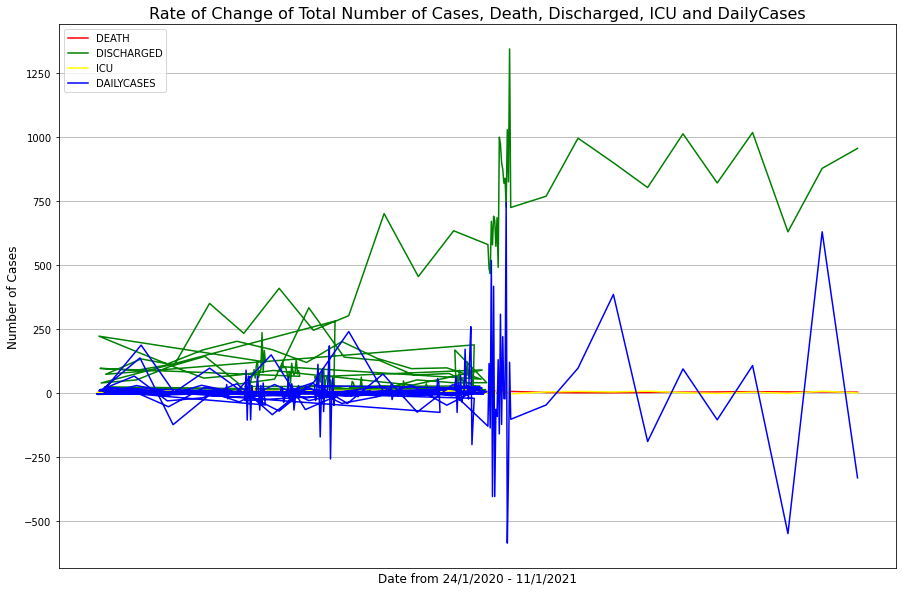

In [214]:
plt.figure(figsize=[15,10])
plt.grid(True)
#plt.plot(Total2['ROC_CASES'], label = 'CASES', color = 'orange')
plt.plot(Total2['ROC_DEATH'], label = 'DEATH', color = 'red')
plt.plot(Total2['ROC_DISCHARGED'], label = 'DISCHARGED', color = 'green')
plt.plot(Total2['ROC_ICU'], label = 'ICU', color = 'yellow')
plt.plot(Total2['ROC_DAILYCASES'], label = 'DAILYCASES', color = 'blue')
#cases are cumulative cases of daily cases
plt.legend(loc=2)
plt.xticks([])
plt.title('Rate of Change of Total Number of Cases, Death, Discharged, ICU and DailyCases', fontsize=16)
plt.xlabel('Date from 24/1/2020 - 11/1/2021', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
#plt.savefig('ROC_ALL.png')

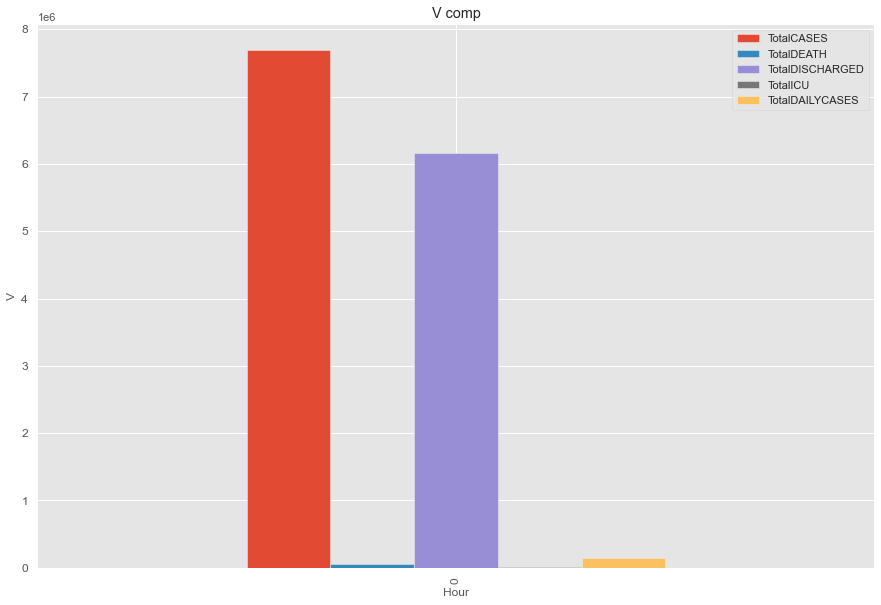

In [163]:
totalbar = pd.read_csv('totalbar.csv')
totalbar

ax = totalbar[['TotalCASES','TotalDEATH','TotalDISCHARGED','TotalICU','TotalDAILYCASES']].plot(kind='bar', title ="V comp", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Hour", fontsize=12)
ax.set_ylabel("V", fontsize=12)
plt.show()
#plt.show()

In [162]:
#totalbar = pd.read_csv('All.csv')
#totalbar
#totalbar['To']=totalbar['dailycases'].sum()
#print(totalbar['To'])

0      138224
1      138224
2      138224
3      138224
4      138224
        ...  
349    138224
350    138224
351    138224
352    138224
353    138224
Name: To, Length: 354, dtype: int64


## 3.0 SEIR Model

In [166]:
import scipy.integrate  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import pandas as pd
 
def base_seir_model(init_vals, params, t):
    S_0, E_0, I_0, R_0 = init_vals
    S, E, I, R = [S_0], [E_0], [I_0], [R_0]
    alpha, beta, gamma = params
    dt = t[1] - t[0]
    for _ in t[1:]:
        next_S = S[-1] - (beta*S[-1]*I[-1])*dt
        next_E = E[-1] + (beta*S[-1]*I[-1] - alpha*E[-1])*dt
        next_I = I[-1] + (alpha*E[-1] - gamma*I[-1])*dt
        next_R = R[-1] + (gamma*I[-1])*dt
        S.append(next_S)
        E.append(next_E)
        I.append(next_I)
        R.append(next_R)
    return np.stack([S, E, I, R]).T

# Define parameters
t_max = 87
dt = 1
t = np.linspace(0, t_max, int(t_max/dt) + 1)
N = 695871
init_vals = 1 - 1/N, 1/N, 0, 0
alpha = 0.2
beta = 1.40 #R0*0.4
gamma = 0.4 
params = alpha, beta, gamma
# Run simulation
results = base_seir_model(init_vals, params, t)

df_SEIR_1 = pd.DataFrame(results, columns=['Susceptible', 'Exposed', 'Infected', 'Removed'])
df_SEIR_1['Day'] = 1 + df_SEIR_1.index
df_SEIR_1['Date']=pd.date_range(start='4/6/2020', periods=t_max+1)
df_SEIR_1_melt = pd.melt(df_SEIR_1, id_vars=['Date'], value_vars=['Susceptible', 'Exposed', 'Infected', 'Removed'])  
df_SEIR_1_melt.value = round(df_SEIR_1_melt.value * N,0)

alt.data_transformers.disable_max_rows()
source = df_SEIR_1_melt
#source = df_melt[df_melt.variable.isin(['E','I'])]


nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['Date'], empty='none')


# The basic line
line = alt.Chart(source, title="Without Vital Dynamic and Social Distancing").mark_line().encode(
    x= alt.X('Date', title='Day'),
    y= alt.Y('value', title='% of Population'),   
    color='variable' 
)
# Transparent selectors across the chart. This is what tells us
# the x-value of the cursor
selectors = alt.Chart(source).mark_point().encode(
    x='Date',
    opacity=alt.value(0),
).add_selection(
    nearest
).interactive()

# Draw points on the line, and highlight based on selection
points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw text labels near the points, and highlight based on selection
text = line.mark_text(align='left', dx=5, dy=-5).encode(
    text=alt.condition(nearest, 'value', alt.value(' '))
)

# Draw a rule at the location of the selection
rules = alt.Chart(source).mark_rule(color='gray').encode(
    x='Date',
).transform_filter(
    nearest
)

# Put the five layers into a chart and bind the data
alt.layer(
    line, selectors, points, rules, text
).properties(
    width=700, height=550
)



alt.LayerChart(...)

## 4.0 Simple Moving Average

In [5]:
mask = se.copy()
mask1 = (mask['DATE'] > '2020-04-05 ') & (mask['DATE'] <= '2020-6-30')
mask1 = mask.loc[mask1]
mask1 = mask1.loc['Petaling']
mask1 = mask1.reset_index(drop=False)
mask1 = mask1.sort_values(by='DATE')
mask1['DAILYCASES'] = (
    mask1['NUMBEROFCUMULATIVECASES']
    .transform(lambda s: s.sub(s.shift().fillna(0)).abs())
)
#mask1 = mask1.tail(-n)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(mask1)

#mask1.isna().sum()


    DISTRICT       DATE  NUMBEROFCUMULATIVECASES  DAILYCASES
40  Petaling 2020-04-06                      434       434.0
61  Petaling 2020-04-07                      437         3.0
64  Petaling 2020-04-08                      439         2.0
67  Petaling 2020-04-09                      440         1.0
70  Petaling 2020-04-10                      471        31.0
73  Petaling 2020-04-11                     1419       948.0
76  Petaling 2020-04-12                     2442      1023.0
1   Petaling 2020-04-13                      351      2091.0
2   Petaling 2020-04-14                      359         8.0
3   Petaling 2020-04-15                      363         4.0
4   Petaling 2020-04-16                      366         3.0
5   Petaling 2020-04-17                      371         5.0
6   Petaling 2020-04-18                      373         2.0
7   Petaling 2020-04-19                      374         1.0
8   Petaling 2020-04-20                      374         0.0
9   Petaling 2020-04-21 

In [8]:
#Simple Moving Average
sma = mask1.copy()
sma['SMA_3'] = sma.iloc[:,-1].rolling(window=3).mean()
sma['SMA_5'] = sma.iloc[:,-1].rolling(window=5).mean()
sma['SMA_7'] = sma.iloc[:,-1].rolling(window=7).mean()
sma = sma.dropna()
#sma['total'] = sma['pandas_SMA_7'].sum()
sma = sma[1:]
sma = sma[:-1]
smaplot = sma.groupby(pd.Grouper(key='DATE',freq='w')).mean()
#sma.to_csv(r'C:\Users\Ann\OneDrive\Desktop\fyp\Coding\sma.csv', index = False)

#final = pd.merge(smaplot, mask1, on=['DATE'])
#final.drop('NUMBEROFCUMULATIVECASES_y', axis=1, inplace=True)
#final
#sma.to_csv(r'C:\Users\Ann\OneDrive\Desktop\fyp\Coding\sma.csv', index = False)


In [9]:
yhat = sma['SMA_3']
zhat = sma['SMA_5']
hat = sma['SMA_7']
ori = sma['DAILYCASES']
e = ori - yhat
f = ori - zhat
g = ori - hat
mse_f1 = np.mean(e**2)
mae_f1 = np.mean(abs(e))
rmse_f1 = np.sqrt(mse_f1)
mse_f2 = np.mean(f**2)
mae_f2 = np.mean(abs(f))
rmse_f2 = np.sqrt(mse_f2)
mse_f3 = np.mean(g**2)
mae_f3 = np.mean(abs(g))
rmse_f3 = np.sqrt(mse_f3)
print("MAE_3:",mae_f1)
#print("MSE_3:", mse_f1)
print("RMSE_3:", rmse_f1)
print("MAE_5:",mae_f2)
#print("MSE_5:", mse_f2)

print("RMSE_5:", rmse_f2)
print("MAE_7:",mae_f3)
#print("MSE_7:", mse_f3)
print("RMSE_7:", rmse_f3)

MAE_3: 69.97354497354497
RMSE_3: 187.8466437071161
MAE_5: 122.44656084656083
RMSE_5: 261.0694359176699
MAE_7: 165.10309901738472
RMSE_7: 293.83867065772284


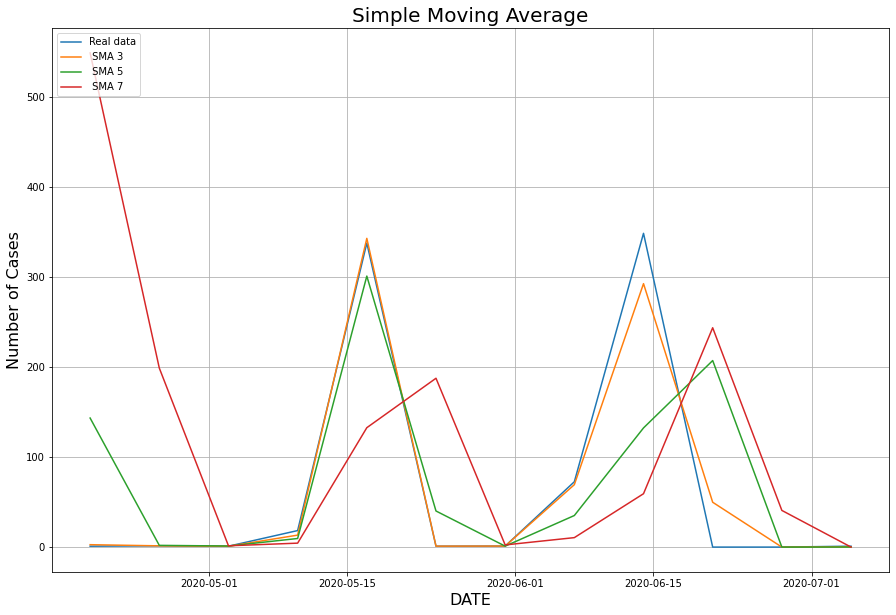

In [11]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(smaplot['DAILYCASES'],label='Real data')
plt.plot(smaplot['SMA_3'],label=' SMA 3 ')
plt.plot(smaplot['SMA_5'],label=' SMA 5 ')
plt.plot(smaplot['SMA_7'],label=' SMA 7 ')
plt.legend(loc=2)
plt.title('Simple Moving Average', fontsize=20)
plt.xlabel('DATE', fontsize=16)
plt.ylabel('Number of Cases', fontsize=16)
#plt.savefig('sma2nd.png')

#### Cumulative Moving Average 

In [190]:

cma = mask1.copy()
calculate = pd.DataFrame(cma.iloc[:,-1])
cma['CMA_3'] = calculate.expanding(min_periods=3).mean()
cma['CMA_5'] = calculate.expanding(min_periods=5).mean()
cma['CMA_7'] = calculate.expanding(min_periods=7).mean()
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
 #   print(mask1)
cmaplot = cma.groupby(pd.Grouper(key='DATE',freq='w')).mean()
#mvplot
cma

,DISTRICT,DATE,NUMBEROFCUMULATIVECASES,DAILYCASES,CMA_3,CMA_5,CMA_7
9,Sepang,2020-09-08,168,168,NaN,NaN,NaN
12,Sepang,2020-09-09,168,0,NaN,NaN,NaN
33,Sepang,2020-09-10,193,25,64.333333,NaN,NaN
55,Sepang,2020-09-11,652,459,163.000000,NaN,NaN
15,Sepang,2020-09-13,168,484,227.200000,227.200000,NaN
...,...,...,...,...,...,...,...
72,Sepang,2020-11-27,920,12,54.416667,54.416667,54.416667
73,Sepang,2020-11-28,925,5,53.739726,53.739726,53.739726
74,Sepang,2020-11-29,939,14,53.202703,53.202703,53.202703
75,Sepang,2020-11-30,951,12,52.653333,52.653333,52.653333


Text(0, 0.5, 'Number of Cases')

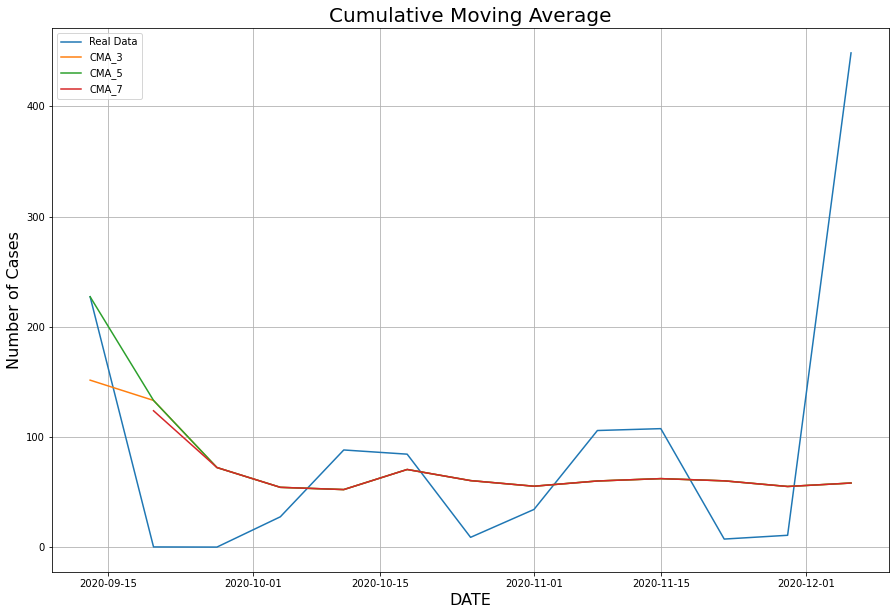

In [191]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(cmaplot['DAILYCASES'],label='Real Data')
plt.plot(cmaplot['CMA_3'],label='CMA_3')
plt.plot(cmaplot['CMA_5'],label='CMA_5')
plt.plot(cmaplot['CMA_7'],label='CMA_7')
plt.legend(loc=2)
plt.title('Cumulative Moving Average', fontsize=20)
plt.xlabel('DATE', fontsize=16)
plt.ylabel('Number of Cases', fontsize=16)

In [192]:
yhat = cma['CMA_3']
zhat = cma['CMA_5']
hat = cma['CMA_7']
ori = cma['DAILYCASES']
e = ori - yhat
f = ori - zhat
g = ori - hat
mse_f1 = np.mean(e**2)
mae_f1 = np.mean(abs(e))
rmse_f1 = np.sqrt(mse_f1)
mse_f2 = np.mean(f**2)
mae_f2 = np.mean(abs(f))
rmse_f2 = np.sqrt(mse_f2)
mse_f3 = np.mean(g**2)
mae_f3 = np.mean(abs(g))
rmse_f3 = np.sqrt(mse_f3)
print("MAE_3:",mae_f1)
print("MSE_3:", mse_f1)
print("RMSE_3:", rmse_f1)
print("MAE_5:",mae_f2)
print("MSE_5:", mse_f2)
print("RMSE_5:", rmse_f2)
print("MAE_7:",mae_f3)
print("MSE_7:", mse_f3)
print("RMSE_7:", rmse_f3)

MAE_3: 92.70080655320515
MSE_3: 24066.949773638615
RMSE_3: 155.1352628309844
MAE_5: 90.61842155005344
MSE_5: 23497.09961302981
RMSE_5: 153.28763685643344
MAE_7: 86.83418597529307
MSE_7: 22714.254586100506
RMSE_7: 150.7124898145489


#### Exponential Moving Average

In [193]:

ema = mask1.copy()
ema['EMA'] = ema.iloc[:,-1].ewm(span=40,adjust=False).mean()
emaplot = ema.groupby(pd.Grouper(key='DATE',freq='w')).mean()
ema.index = ema['DATE']
ema = ema.drop(['DATE'], axis = 1)
ema

,DISTRICT,NUMBEROFCUMULATIVECASES,DAILYCASES,EMA
DATE,,,,
2020-09-08,Sepang,168,168,168.000000
2020-09-09,Sepang,168,0,159.804878
2020-09-10,Sepang,193,25,153.229030
2020-09-11,Sepang,652,459,168.144687
2020-09-13,Sepang,168,484,183.552264
...,...,...,...,...
2020-11-27,Sepang,920,12,44.915787
2020-11-28,Sepang,925,5,42.968675
2020-11-29,Sepang,939,14,41.555569


Text(0, 0.5, 'Number of Cases')

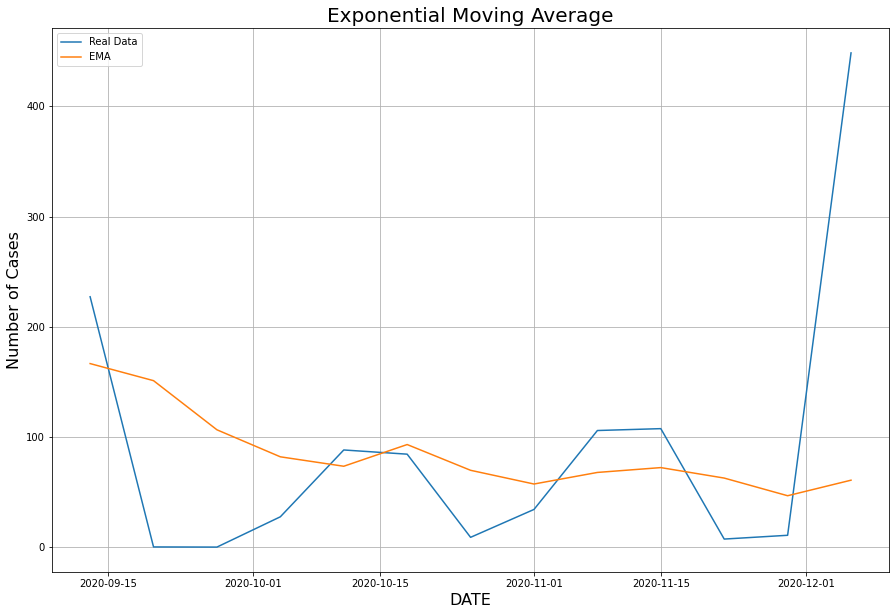

In [194]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(emaplot['DAILYCASES'],label='Real Data')
plt.plot(emaplot['EMA'],label='EMA')
plt.legend(loc=2)
plt.title('Exponential Moving Average', fontsize=20)
plt.xlabel('DATE', fontsize=16)
plt.ylabel('Number of Cases', fontsize=16)

In [195]:
yhat = ema['EMA']
ori = ema['DAILYCASES']
d = ori - yhat
mse_f = np.mean(d**2)
mae_f = np.mean(abs(d))
rmse_f = np.sqrt(mse_f)
#r2_f = 1-(sum(d**2)/sum((y-np.mean(y))**2))

print("MAE:",mae_f)
print("MSE:", mse_f)
print("RMSE:", rmse_f)
#print("R-Squared:", r2_f)

MAE: 101.3629692882516
MSE: 24590.855297248687
RMSE: 156.8147164562328


### Dump

D:\CodeBlock\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: Second argument 'y1' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  after removing the cwd from sys.path.
D:\CodeBlock\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: Second argument 'y2' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  """
D:\CodeBlock\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: Second argument 'y3' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as 

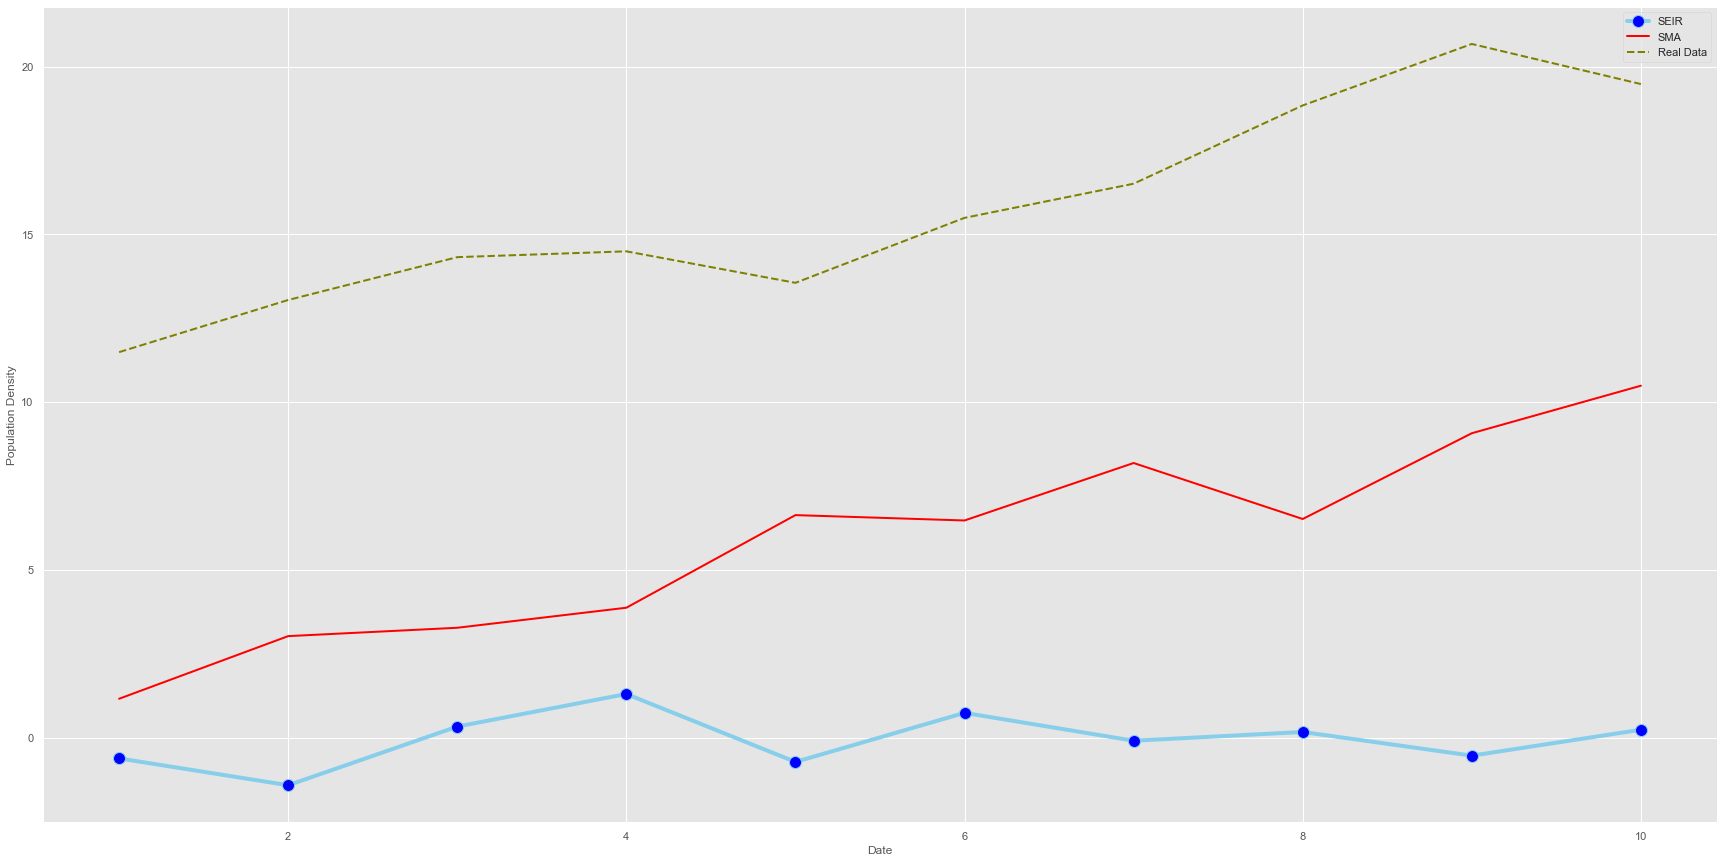

In [36]:
line=pd.DataFrame({'x': range(1,11), 'y1': np.random.randn(10), 'y2': np.random.randn(10)+range(1,11), 'y3': np.random.randn(10)+range(11,21) })
 
# multiple line plot
plt.plot( 'x', 'y1', data=line, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4, label="SEIR")
plt.plot( 'x', 'y2', data=line, marker='', color='red', linewidth=2, label="SMA")
plt.plot( 'x', 'y3', data=line, marker='', color='olive', linewidth=2, linestyle='dashed', label="Real Data")
plt.xlabel('Date')
plt.ylabel('Population Density')
plt.legend()
plt.savefig('line.png')